# Malaysia COVID-19 Cases and Vaccination

Data taken from [**Malaysia's Ministry of Health**](https://github.com/MoH-Malaysia/covid19-public) and [**COVID-19 Immunisation Task Force (CITF)**](https://github.com/CITF-Malaysia/citf-public) as of **`6-10-2021`** (cut-off date).

1. [covid19-public](https://github.com/MoH-Malaysia/covid19-public/tree/9a8482527c486effa37900756631f843af4d6373)
2. [citf-public](https://github.com/CITF-Malaysia/citf-public/tree/46f91d6e18e38a24034bf8f791cd279b31f94f24)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import pickle

from imblearn.over_sampling import SMOTE
from collections import Counter

## 1. Loading Cleaned Datasets

Loading cleaned datasets that was pickled in `EDA_Epidemic.ipynb`, `EDA_Vaccination_&_Registration.ipynb`, and `EDA_MySejahtera.ipynb`

In [2]:
##### EPIDEMIC dataset #####
## Cases and Testing
cases_malaysia = pickle.load(open('pickle_files/cases_malaysia.pkl', 'rb'))
cases_malaysia_cluster = pickle.load(open('pickle_files/cases_malaysia_cluster.pkl', 'rb'))
cases_state = pickle.load(open('pickle_files/cases_state.pkl', 'rb')) 

tests_malaysia = pickle.load(open('pickle_files/tests_malaysia.pkl', 'rb')) 
tests_state = pickle.load(open('pickle_files/tests_state.pkl', 'rb')) 

## Deaths
deaths_malaysia = pickle.load(open('pickle_files/deaths_malaysia.pkl', 'rb'))
deaths_state = pickle.load(open('pickle_files/deaths_state.pkl', 'rb')) 

## Static Data
population = pd.read_csv('dataset/static/population_moh.csv')

##### VACCINATION & REGISTRATION dataset #####
## Adverse Events Following Immunization (AEFI)
aefi = pickle.load(open('pickle_files/aefi.pkl', 'rb'))
aefi_serious = pickle.load(open('pickle_files/aefi.pkl', 'rb'))

## Vaccination
vax_malaysia = pickle.load(open('pickle_files/vax_malaysia.pkl', 'rb'))
vax_state = pickle.load(open('pickle_files/vax_state.pkl', 'rb'))

## Registration
vaxreg_malaysia = pickle.load(open('pickle_files/vaxreg_malaysia.pkl', 'rb'))
vaxreg_state = pickle.load(open('pickle_files/vaxreg_state.pkl', 'rb'))

##### MYSEJAHTERA dataset #####
checkin_malaysia = pickle.load(open('pickle_files/checkin_malaysia.pkl', 'rb'))
checkin_malaysia_time = pickle.load(open('pickle_files/checkin_malaysia_time.pkl', 'rb'))
checkin_state = pickle.load(open('pickle_files/checkin_state.pkl', 'rb'))
trace_malaysia = pickle.load(open('pickle_files/trace_malaysia.pkl', 'rb'))

# 2. Questions
1. What are the cases, tests and deaths rate of each state in Malaysia? Do they correlate with each other? 
    - Can use histogram + line graph (not observing rate)
    - Bar/Pie? (to observe rate)
    - 16 states x 3 (cases, tests, deaths) x 2 (types of plots)
    
    
2. Cluster? Date start and date end
    - Cluster analysis (Lab10)
    
    
3. Which states are not doing well? (more cases and deaths)
    - Rank according states
    - Population / land area (need additional dataset)


4. Bed utilization rate


5. Analyse covid cases based on cases type in Malaysia
    - Cases
    - Vaccination Status
    - Age Group (0-11, 12-17, 18-59, >60)


6. EDA for covid cases based on state


## Final Selection
1. Analyse covid cases based on cases type in Malaysia
2. 

# 3. EDA
Using [pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

### 3.1 cases_malaysia

In [84]:
cases_malaysia.tail(3)

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly
617,2021-10-03,9066,12,14454,150146,388,1119,4941,1700,764,5348,1087
618,2021-10-04,8075,6,15456,142746,731,1093,4282,1353,641,5050,948
619,2021-10-05,8817,14,15615,135945,619,1060,5105,1386,686,5624,1007


In [32]:
cases_type = ['cases_new',\
              'cases_import',\
              'cases_recovered',\
              'cases_cluster',\
              'cases_pvax','cases_fvax',\
              'cases_child','cases_adolescent','cases_adult','cases_elderly']
cases_malaysia_melt = cases_malaysia[cases_type].melt()
cases_malaysia_melt.columns = ['cases_type', 'count'] # change column name
cases_malaysia_melt

,cases_type,count
0,cases_new,4
1,cases_new,0
2,cases_new,0
3,cases_new,0
4,cases_new,3
...,...,...
6195,cases_elderly,1277
6196,cases_elderly,1166
6197,cases_elderly,1087
6198,cases_elderly,948


In [93]:
# sns.set(rc={'figure.figsize':(11,6)})
# sns.set(style="whitegrid", color_codes=True)

# plot_cases_type = sns.swarmplot(x='cases_Type', y='count', data=cases_malaysia_melt)

# plot_cases_type.set_xticklabels(plot_cases_type.get_xticklabels(), rotation=90)
# plot_cases_type.set_title('Cases Type and Count')
# plot_cases_type.set_ylabel('Cases Type')
# plot_cases_type.set_xlabel('Count')

In [94]:
# sns.set_style("ticks")
# sns.pairplot(cases_malaysia.loc[:,['cases_child','cases_adolescent','cases_adult','cases_elderly']])

In [37]:
df_casesTotal = cases_malaysia_melt.groupby(["cases_type"]).sum() 
df_casesTotal.reset_index(inplace=True)
df_casesTotal

,cases_type,count
0,cases_adolescent,158432
1,cases_adult,1577927
2,cases_child,304128
3,cases_cluster,473962
4,cases_elderly,182713
5,cases_fvax,343027
6,cases_import,4915
7,cases_new,2294457
8,cases_pvax,373610
9,cases_recovered,2131636


In [78]:
options = ['cases_child','cases_adolescent','cases_adult','cases_elderly']
df_casesAgeTotal = df_casesTotal.loc[df_casesTotal['cases_type'].isin(options)]
df_casesAgeTotal.sort_values('count', axis=0, inplace=True)
df_casesAgeTotal

<ipython-input-78-def7bced8fc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casesAgeTotal.sort_values('count', axis=0, inplace=True)


,cases_type,count
0,cases_adolescent,158432
4,cases_elderly,182713
2,cases_child,304128
1,cases_adult,1577927


In [69]:
ageVerifiedTotal = df_casesAgeTotal['count'].sum()
casesTotal = df_casesTotal[df_casesTotal['cases_type'] == 'cases_new']['count'].sum()
ageUnVerifiedTotal = casesTotal - ageVerifiedTotal
ageUnVerifiedTotal

71257

In [80]:
ageUnVerifiedDict = {'cases_type': 'cases_unverified_age', 'count': ageUnVerifiedTotal}
df_casesAgeTotal = df_casesAgeTotal.append(ageUnVerifiedDict, ignore_index = True,)
df_casesAgeTotal.sort_values('count', axis=0, inplace=True)
df_casesAgeTotal

,cases_type,count
4,cases_unverified_age,71257
0,cases_adolescent,158432
1,cases_elderly,182713
2,cases_child,304128
3,cases_adult,1577927


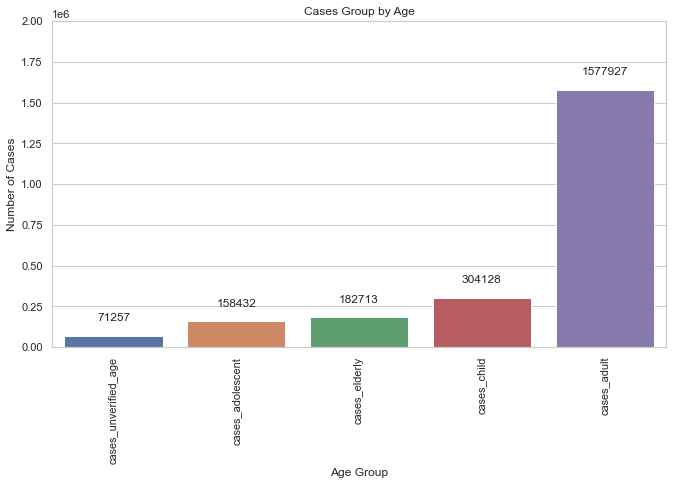

In [83]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x="cases_type", y="count",  data=df_casesAgeTotal)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title('Cases Group by Age')
b.set_ylabel('Number of Cases')
b.set_xlabel('Age Group')
b.set(ylim=(0, 2000000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=0, 
	xytext=(0, 18), textcoords='offset points')

One key observation is that cases_child has more than 100k than other age limit accept cases_adult. The reason is unknown but we deduce that if the adult get covid cases, there's high chance that the child have to depends on adults

In [89]:
options = ['cases_pvax','cases_fvax']
df_casesGroupByVaccine = df_casesTotal.loc[df_casesTotal['cases_type'].isin(options)]
df_casesGroupByVaccine.sort_values('count', axis=0, inplace=True)
df_casesGroupByVaccine

<ipython-input-89-ddd09ae0c684>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casesGroupByVaccine.sort_values('count', axis=0, inplace=True)


,cases_type,count
5,cases_fvax,343027
8,cases_pvax,373610


In [90]:
casesVaccinedTotal = df_casesGroupByVaccine['count'].sum()
casesTotal = df_casesTotal[df_casesTotal['cases_type'] == 'cases_new']['count'].sum()
casesUnvaccinatedTotal = casesTotal - casesVaccinedTotal
casesUnvaccinatedTotal

1577820

In [91]:
casesUnvaccinatedDict = {'cases_type': 'cases_unvaccinated', 'count': casesUnvaccinatedTotal}
df_casesGroupByVaccine = df_casesGroupByVaccine.append(casesUnvaccinatedDict, ignore_index = True,)
df_casesGroupByVaccine.sort_values('count', axis=0, inplace=True)
df_casesGroupByVaccine

,cases_type,count
0,cases_fvax,343027
1,cases_pvax,373610
2,cases_unvaccinated,1577820


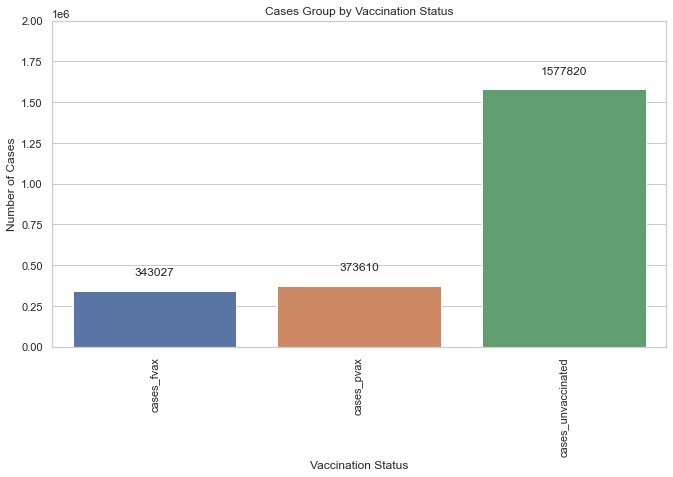

In [92]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x="cases_type", y="count",  data=df_casesGroupByVaccine)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title('Cases Group by Vaccination Status')
b.set_ylabel('Number of Cases')
b.set_xlabel('Vaccination Status')
b.set(ylim=(0, 2000000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=0, 
	xytext=(0, 18), textcoords='offset points')

### 3.2 cases_malaysia_cluster

In [96]:
cases_malaysia_cluster.head(3)

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
342,2021-01-01,2068,2,2230,23382,944,0,0,121,76,1721,119,0.0,0.0,35.0,17.0,0.0,18.0,671.0
343,2021-01-02,2295,9,3321,22347,1091,0,0,116,61,1896,117,0.0,2.0,30.0,33.0,0.0,135.0,882.0
344,2021-01-03,1704,5,2726,21317,588,0,0,160,77,1307,118,0.0,0.0,41.0,25.0,0.0,83.0,432.0


In [103]:
cases_type2 = [#'cases_new',\
              'cluster_import',\
              'cluster_religious',\
              'cluster_community',\
              'cluster_highRisk',\
              'cluster_education',\
              'cluster_detentionCentre',\
              'cluster_workplace']
cases_malaysia_cluster_melt = cases_malaysia_cluster[cases_type2].melt()
cases_malaysia_cluster_melt.columns = ['cluster_type', 'count'] # change column name
cases_malaysia_cluster_melt

,cluster_type,count
0,cluster_import,0.0
1,cluster_import,0.0
2,cluster_import,0.0
3,cluster_import,0.0
4,cluster_import,0.0
...,...,...
1941,cluster_workplace,393.0
1942,cluster_workplace,380.0
1943,cluster_workplace,140.0
1944,cluster_workplace,613.0


In [104]:
df_casesClusterTotal = cases_malaysia_cluster_melt.groupby(["cluster_type"]).sum() 
df_casesClusterTotal.sort_values('count', axis=0, inplace=True)
df_casesClusterTotal.reset_index(inplace=True)
df_casesClusterTotal

,cluster_type,count
0,cluster_import,131.0
1,cluster_religious,8194.0
2,cluster_highRisk,8494.0
3,cluster_education,10851.0
4,cluster_detentionCentre,21832.0
5,cluster_community,69732.0
6,cluster_workplace,219381.0


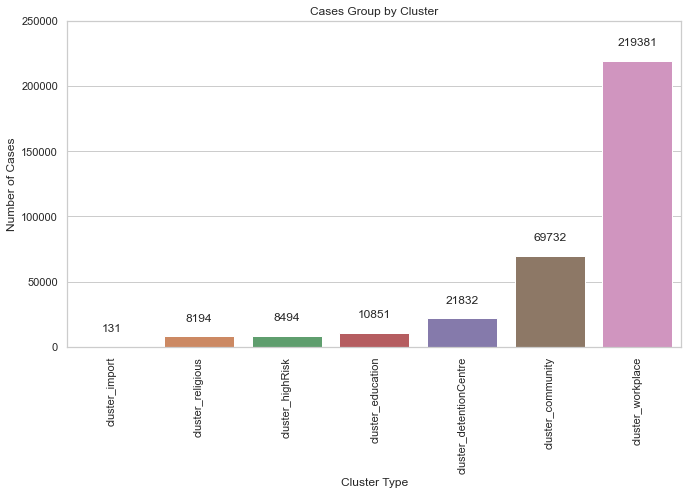

In [108]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x="cluster_type", y="count",  data=df_casesClusterTotal)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title('Cases Group by Cluster')
b.set_ylabel('Number of Cases')
b.set_xlabel('Cluster Type')
b.set(ylim=(0, 250000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=0, 
	xytext=(0, 18), textcoords='offset points')

### 3.3 cases_state

In [109]:
cases_state.head(3)

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cases_elderly
0,2020-01-25,Johor,4,4,0,4,0,0,0,0,0,1,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# can do the same grouping based on state

In [112]:
tests_state.head(3)

,date,state,rtk-ag,pcr
0,2021-07-01,Johor,2749,3670
1,2021-07-01,Kedah,2073,1297
2,2021-07-01,Kelantan,1348,1966


In [113]:
deaths_state.head(3)

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
0,2020-03-17,Johor,1,0,1,0,0,0,0
1,2020-03-17,Kedah,0,0,0,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0,0,0,0


EDA to do list
1. investigate selangor hospital utilization
2. EDA about test, death and cases
3. Correlation

### Merged dataset

Watch this moving average and window rolling tutorials
https://www.youtube.com/watch?v=T2mQiesnx8s

In [168]:
# malaysia cases
df_cases_my = cases_malaysia[['date','cases_new','cases_recovered','cases_active']]
df_cases_my['cumul_cases_new'] = df_cases_my['cases_new'].cumsum()
df_cases_my['cases_mov_avg'] = df_cases_my['cumul_cases_new'] / (df_cases_my.index +1)
df_cases_my

<ipython-input-168-931b3b4fae43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases_my['cumul_cases_new'] = df_cases_my['cases_new'].cumsum()
<ipython-input-168-931b3b4fae43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases_my['cases_mov_avg'] = df_cases_my['cumul_cases_new'] / (df_cases_my.index +1)


,date,cases_new,cases_recovered,cases_active,cumul_cases_new,cases_mov_avg
0,2020-01-25,4,0,4,4,4.000000
1,2020-01-26,0,0,4,4,2.000000
2,2020-01-27,0,0,4,4,1.333333
3,2020-01-28,0,0,4,4,1.000000
4,2020-01-29,3,0,7,7,1.400000
...,...,...,...,...,...,...
615,2021-10-01,11889,15891,160144,2257584,3664.909091
616,2021-10-02,10915,15396,155578,2268499,3676.659643
617,2021-10-03,9066,14454,150146,2277565,3685.380259
618,2021-10-04,8075,15456,142746,2285640,3692.471729


In [173]:
temp = df_cases_my.copy()
# temp = temp[temp.state == s]
temp['cases_new_norm'] = (temp.cases_new - temp.cases_new.min()) / (temp.cases_new.max() - temp.cases_new.min()) * 100
temp['cases_new_norm_ma'] = temp['cases_new'].rolling(window=2).mean()
temp.head(7)

,date,cases_new,cases_recovered,cases_active,cumul_cases_new,cases_mov_avg,cases_new_norm,cases_new_norm_ma
0,2020-01-25,4,0,4,4,4.000000,0.016261,NaN
1,2020-01-26,0,0,4,4,2.000000,0.000000,2.0
2,2020-01-27,0,0,4,4,1.333333,0.000000,0.0
3,2020-01-28,0,0,4,4,1.000000,0.000000,0.0
4,2020-01-29,3,0,7,7,1.400000,0.012196,1.5
5,2020-01-30,1,0,8,8,1.333333,0.004065,2.0
6,2020-01-31,0,0,8,8,1.142857,0.000000,0.5


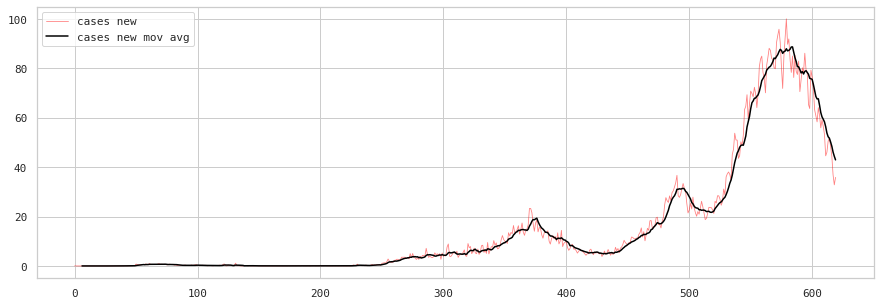

In [167]:
plt.figure(figsize=(15, 5))
figure.suptitle('COVID-19 Case Trends')

temp['cases_new'].plot(legend=None, color='red', label="cases new", linewidth =0.8, alpha = 0.5)
temp['cases_new_ma'].plot(legend=None, color='black', label="cases new mov avg")

plt.legend()

In [ ]:
# sns.set(rc={'figure.figsize':(11,6)})

# correlation_matrix = df_wtf.iloc[:,:].corr().round(1)

# sns.heatmap(data=correlation_matrix, annot=True)